In [710]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp


In [711]:


number_of_points = 1000
domain_start = 0
domain_end = 1

time = np.linspace(domain_start, domain_end, number_of_points)


freq = 4
om = freq * 2 * np.pi

poly_speed = np.polyfit(np.linspace(domain_start, domain_end, 6), [0.5, 0.5, 0.5, 0.5, 0.5, 0.5], deg=0)
poly_turn = np.polyint(poly_speed, k=2)
poly_acceleration = np.polyder(poly_speed)


smooth_speed = np.polyval(poly_speed, time)
smooth_turn = np.mod(np.polyval(poly_turn, time), 2*np.pi)
smooth_accelrateion = np.polyval(poly_acceleration, time)



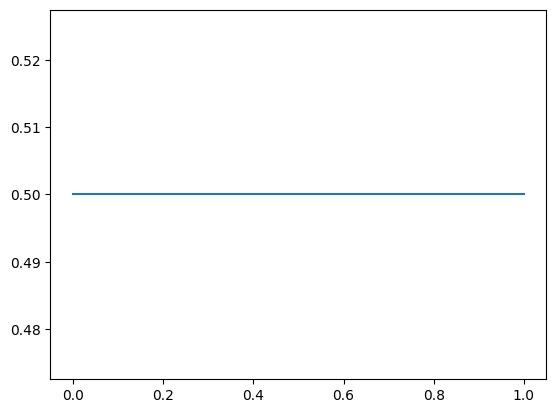

In [712]:
plt.plot(time, smooth_speed)

In [713]:
a = 2
b = 0.5
c = -0.2
d = 2
e = -0.3

ripples = (a + b * np.exp(c * smooth_speed)) * np.sin(om * smooth_turn + d + e*smooth_speed)

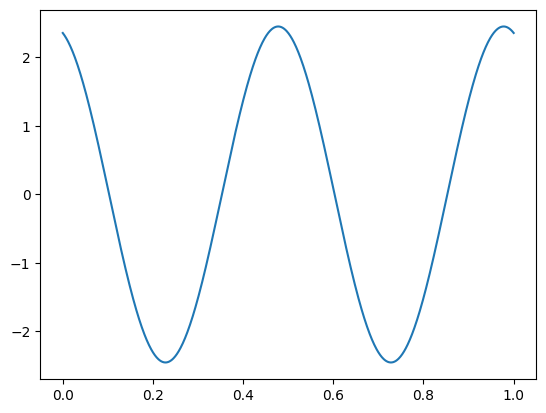

In [714]:
plt.plot(time, ripples)

In [715]:
sp.integrate.simpson( y=ripples, x=time)

5.364211548911091e-11

In [716]:
P = domain_end - domain_start
A0 = 1/(domain_end - domain_start) * sp.integrate.simpson(x=time, y=ripples)

A0

5.364211548911091e-11

In [717]:

A1 = 2/P * sp.integrate.simpson(x=time, y=ripples*np.cos(2*np.pi * 1/P * time))
B1 = 2/P * sp.integrate.simpson(x=time, y=ripples*np.sin(2*np.pi * 1/P * time))
A1, B1

(1.8372608209110686e-10, -6.394486921237441e-10)

In [718]:
A2 = 2/P * sp.integrate.simpson(x=time, y=ripples*np.cos(2*np.pi * 2/P * time))
B2 = 2/P * sp.integrate.simpson(x=time, y=ripples*np.sin(2*np.pi * 2/P * time))
A2, B2

(2.357449292701009, -0.6758626789117474)

In [719]:
A3 = 2/P * sp.integrate.simpson(x=time, y=ripples*np.cos(2*np.pi * 3/P * time))
B3 = 2/P * sp.integrate.simpson(x=time, y=ripples*np.sin(2*np.pi * 3/P * time))
A3, B3

(7.729189076960408e-10, -3.108338191682271e-09)

In [720]:
A4 = 2/P * sp.integrate.simpson(x=time, y=ripples*np.cos(2*np.pi * 4/P * time))
B4 = 2/P * sp.integrate.simpson(x=time, y=ripples*np.sin(2*np.pi * 4/P * time))
A4, B4

(1.2558835724846285e-09, -5.532368441753819e-09)

In [721]:
A5 = 2/P * sp.integrate.simpson(x=time, y=ripples*np.cos(2*np.pi * 5/P * time))
B5 = 2/P * sp.integrate.simpson(x=time, y=ripples*np.sin(2*np.pi * 5/P * time))
A5, B5

(1.832159951531409e-09, -9.14534362845556e-09)

In [722]:
A6 = 2/P * sp.integrate.simpson(x=time, y=ripples*np.cos(2*np.pi * 6/P * time))
B6 = 2/P * sp.integrate.simpson(x=time, y=ripples*np.sin(2*np.pi * 6/P * time))
A6, B6

(2.4682484354998646e-09, -1.4243618904607731e-08)

In [723]:
def cos_coef(x, y, n, domain_length):
    return 2/P * sp.integrate.simpson(x=x, y=y*np.cos(2*np.pi * n/domain_length * x))

def sin_coef(x, y, n, domain_length):
    return 2/P * sp.integrate.simpson(x=x, y=y*np.sin(2*np.pi * n/domain_length * x))

def fourier(x, y, domain_length, number_of_terms):
    A0 = 1/domain_length * sp.integrate.simpson(x=x, y=y)
    
    return A0 + np.sum(list(map(lambda term: cos_coef(x, y, term, domain_length) * np.cos(2*np.pi * term/domain_length * x) + 
                                    sin_coef(x, y, term, domain_length) * np.sin(2*np.pi * term/domain_length * x), range(1,number_of_terms+1))), axis=0)
    
    
def fourier_double_int(x, y, domain_length, number_of_terms, a, b, c):
    A0 = 1/domain_length * sp.integrate.simpson(x=x, y=y)
    
    return A0 + a + b*np.array(x) + c*np.array(x)**2 + np.sum(list(map(lambda term: cos_coef(x, y, term, domain_length)* (domain_length/2/np.pi / term)**2 * -np.cos(2*np.pi * term/domain_length * x) + 
                                    sin_coef(x, y, term, domain_length) * (domain_length/2/np.pi / term)**2 * -np.sin(2*np.pi * term/domain_length * x), range(1,number_of_terms+1))), axis=0)

In [724]:
ripple_estimation = A0 + \
    A1 * np.cos(2*np.pi * 1/P * time) + B1 * np.sin(2*np.pi * 1/P * time) + \
    A2 * np.cos(2*np.pi * 2/P * time) + B2 * np.sin(2*np.pi * 2/P * time) + \
    A3 * np.cos(2*np.pi * 3/P * time) + B3 * np.sin(2*np.pi * 3/P * time) + \
    A4 * np.cos(2*np.pi * 4/P * time) + B4 * np.sin(2*np.pi * 4/P * time) + \
    A5 * np.cos(2*np.pi * 5/P * time) + B5 * np.sin(2*np.pi * 5/P * time) + \
    A6 * np.cos(2*np.pi * 6/P * time) + B6 * np.sin(2*np.pi * 6/P * time)

In [725]:
ripple_estimation = fourier(time, ripples, P, 300)
ripple_estimation

array([ 2.25873695e+00,  2.34273572e+00,  2.40960524e+00,  2.32340741e+00,
        2.27938891e+00,  2.33202635e+00,  2.31946249e+00,  2.26277697e+00,
        2.27562009e+00,  2.28803860e+00,  2.24375450e+00,  2.22895146e+00,
        2.24483997e+00,  2.21797137e+00,  2.18770096e+00,  2.19563714e+00,
        2.18396078e+00,  2.14891894e+00,  2.14398058e+00,  2.14163616e+00,
        2.10981287e+00,  2.09209460e+00,  2.09205276e+00,  2.06784242e+00,
        2.04092345e+00,  2.03704164e+00,  2.02110718e+00,  1.99022352e+00,
        1.97868630e+00,  1.96866140e+00,  1.93886855e+00,  1.91878039e+00,
        1.91059655e+00,  1.88532600e+00,  1.85841760e+00,  1.84785796e+00,
        1.82817772e+00,  1.79781940e+00,  1.78185761e+00,  1.76654162e+00,
        1.73642916e+00,  1.71400710e+00,  1.70028581e+00,  1.67322095e+00,
        1.64531159e+00,  1.62999432e+00,  1.60711130e+00,  1.57613742e+00,
        1.55672013e+00,  1.53734051e+00,  1.50620548e+00,  1.48162226e+00,
        1.46371017e+00,  

In [726]:
Iq_ripple = fourier_double_int(time, ripples, P, 300, 0, 0, 0)
Iq_ripple

array([-1.49286725e-02, -1.48736859e-02, -1.48163538e-02, -1.47566221e-02,
       -1.46945578e-02, -1.46302002e-02, -1.45635126e-02, -1.44945050e-02,
       -1.44232232e-02, -1.43496613e-02, -1.42738125e-02, -1.41957124e-02,
       -1.41153758e-02, -1.40327942e-02, -1.39479905e-02, -1.38609909e-02,
       -1.37717932e-02, -1.36804095e-02, -1.35868696e-02, -1.34911811e-02,
       -1.33933497e-02, -1.32934027e-02, -1.31913577e-02, -1.30872190e-02,
       -1.29810084e-02, -1.28727506e-02, -1.27624528e-02, -1.26501314e-02,
       -1.25358138e-02, -1.24195134e-02, -1.23012424e-02, -1.21810276e-02,
       -1.20588891e-02, -1.19348378e-02, -1.18088976e-02, -1.16810935e-02,
       -1.15514389e-02, -1.14199535e-02, -1.12866651e-02, -1.11515913e-02,
       -1.10147489e-02, -1.08761659e-02, -1.07358644e-02, -1.05938607e-02,
       -1.04501804e-02, -1.03048503e-02, -1.01578877e-02, -1.00093155e-02,
       -9.85916291e-03, -9.70745045e-03, -9.55419875e-03, -9.39943716e-03,
       -9.24319031e-03, -

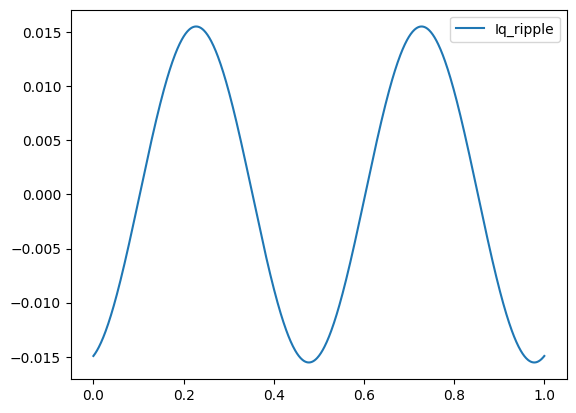

In [728]:
#plt.plot(time, ripples, label="ripples")
#plt.plot(time, ripple_estimation, label="ripple_estimation")
plt.plot(time, Iq_ripple, label="Iq_ripple")
plt.legend()